# Plotting the incidences of BW counties

In [1]:
import pandas as pd    # Pandas is a library to analyse various data structures
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Here we read the csv-file holding the data.
# Note: the separator is a ; instead of a comma, all NA-values gave to be skipped
df_csv = pd.read_csv('./Infizierte.csv', sep=';',na_filter=False)
keys=df_csv.keys()
# Let us pack the counties names into a dictionary and number them
# e.g. {'Biberach': 1}
nkreise=np.arange(len(df_csv.to_numpy()[:,0]))
dict_kreise = dict(zip(df_csv.to_numpy()[:,0],nkreise))
#
df_csv = pd.read_csv('./Infizierte220111.csv',header=None, sep=';',na_filter=False)
data=df_csv.to_numpy()
#
dfEWZ_csv = pd.read_csv('./EWZLandkreise.csv',header=None, sep=';',na_filter=False)
dict_EWZkreise = dict(dfEWZ_csv.to_numpy())


for kreisname in dict_EWZkreise.keys():
    dict_EWZkreise[kreisname] = {"index": dict_kreise[kreisname], "einwohner": dict_EWZkreise[kreisname]}
    
# dict_EWZkreise now holds a dictionary where each the value of each key is another dictory: 
# example: dict_EWZkreise["Freiburg im Breisgau (Stadtkreis)" = {'index': 36, 'einwohner': 230940}

In [13]:
# transform data to float
irange=np.arange(data.shape[0])
jrange=np.arange(1,data.shape[1])
datafloat=np.zeros(data.shape)
dataint=np.zeros(data.shape)
for i in irange: 
    for j in jrange:
        if data[i,j] =='': 
            datafloat[i,j]=0.
            dataint[i,j]=0
        else:
            datafloat[i,j]=float(data[i,j])
            dataint[i,j]=int(data[i,j])
#
kreisliste = ['Freiburg im Breisgau (Stadtkreis)', 'Schwäbisch Hall']

<IPython.core.display.Javascript object>


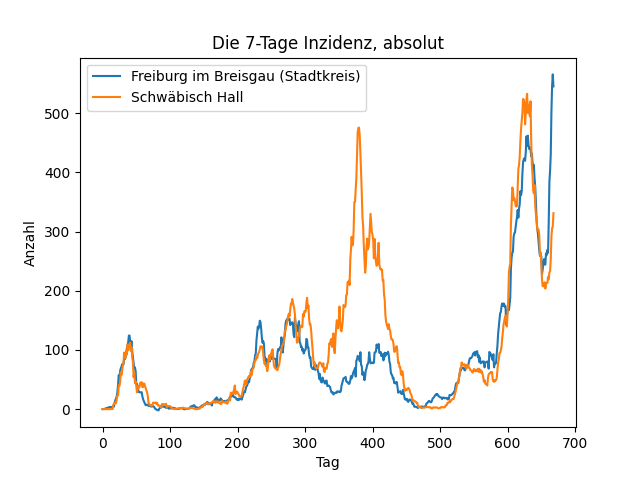

[Text(0, 0.5, 'Anzahl')]

In [14]:
%matplotlib notebook
fig, ax = plt.subplots() # let us plot the data
for kreis in kreisliste:
#for i in np.arange(44):
    entry = dict_EWZkreise[kreis]
    factor=1.e5/entry["einwohner"]
    #factor = 1.
    #y = np.flip(datafloat[dict_kreise[kreis]])
    y = np.flip(datafloat[entry["index"],1:])
    y14 = np.roll(y,7)
    y14[:13] = 0
    delta = y  - y14
    ax.plot(factor*delta[0:], label=kreis)
    #ax.plot(y, label=kreis)
#
ax.legend()
ax.set_title('Die 7-Tage Inzidenz, absolut')
ax.set(xlabel='Tag')
ax.set(ylabel='Anzahl')

In [ ]:
yHall = datafloat[28,1:]
yFrei =datafloat[36,1:]
DeltaHall = (yHall-np.roll(yHall,-7))*1.e5/EWZahl[28]
DeltaFrei = (yFrei-np.roll(yFrei,-7))*1.e5/EWZahl[36]
#plt.plot(np.flip(DeltaHall[:-7]))
#plt.plot(np.flip(DeltaFrei[:-7]))

# Correlation functions

The correlation function for two signals $A(t)$ and $B(t)$ is defined as 
$$
C(t)=\lim_{\tau\rightarrow\infty}\frac{1}{\tau}\int\limits_0^\tau A(t')B(t'-t)dt'$$
Diskrete version
$$ C(k\cdot\Delta\,t)=\lim_{\Delta\,t\rightarrow 0\atop n\rightarrow\infty}\sum_{i=1}^{n}A(i\cdot\Delta\,t)\cdot
B\left((i-k)\cdot\Delta\,t\right)$$
Let's have some examples.

Note: Please subtract mean of every series A and B. See below

<IPython.core.display.Javascript object>


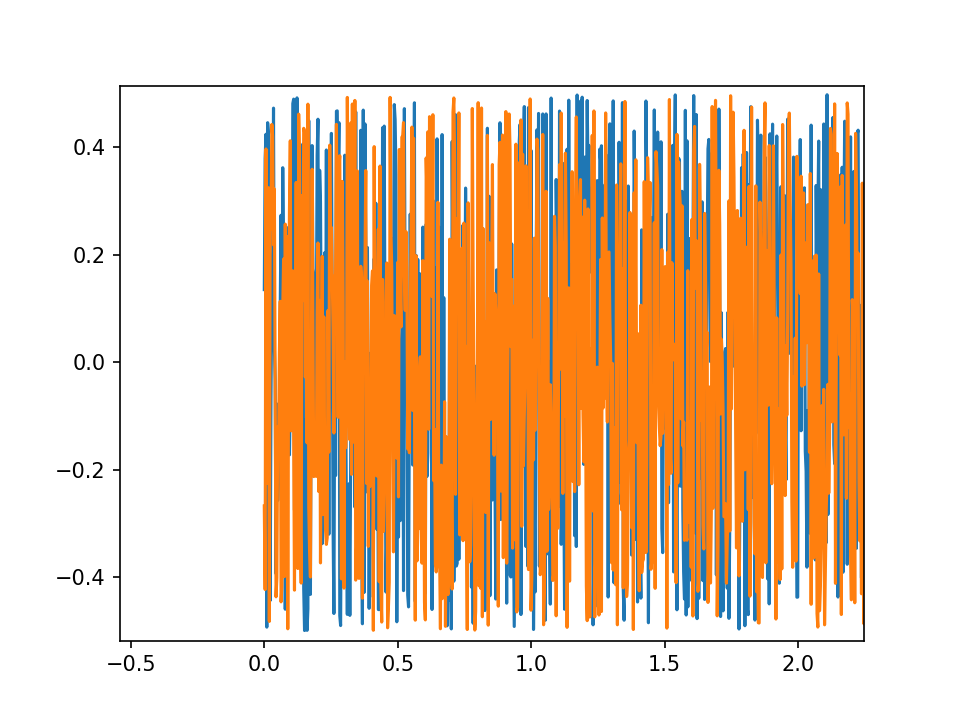

In [14]:
%matplotlib notebook
# A = B = sin(a t)
n = 20000
a = 1.
t = np.linspace(0,20*np.pi,n)
#A = np.sin(t)
#B = np.cos(t)
A = np.random.rand(n)
B = np.random.rand(n)
A = A - np.mean(A) # Subtract mean
B = B - np.mean(B) # dto.
plt.plot(t, A)
plt.plot(t, B)

In [37]:
# Calculate Korrelation function between A and B. Watch out for the correct n
A = datafloat[36,1:]
B = datafloat[28,1:]
A = A - np.mean(A)
B = B - np.mean(B)
lmax = B.shape[0]//2
C = np.zeros(lmax)
S_A = np.sqrt(np.sum(A[:lmax]*A[:lmax])/lmax)
for k in np.arange(lmax):
    D = np.roll(B, shift = -k)[:lmax]
    S_B = np.sqrt(np.sum(D*D)/lmax)
    C[k] = np.sum(A[:lmax] * D)/lmax/S_A/S_B

<IPython.core.display.Javascript object>


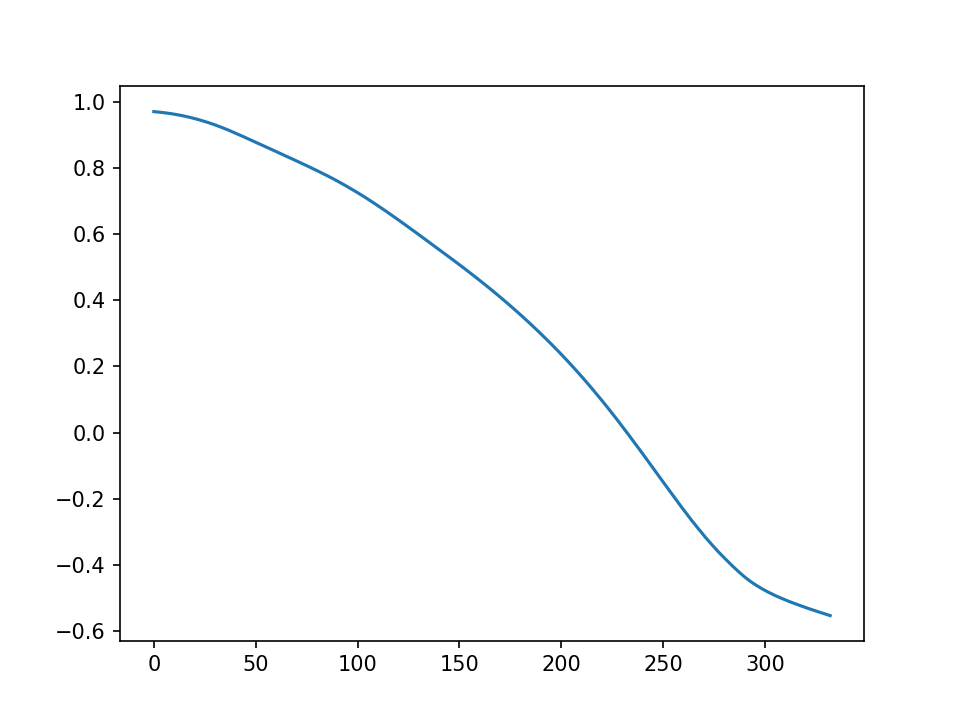

In [38]:
%matplotlib notebook
plt.plot(C[1:])

In [ ]:
np.mean(np.flip(datafloat[dict_kreise[kreisliste[0]],1:]))

## Correlation between incidences of 2 counties in BW


In [ ]:
%matplotlib notebook
fig, ax = plt.subplots() # let us plot the data
# Plot Freiburg incidences - mean
for kreis in kreisliste:
    ax.plot(datafloat[dict_kreise[kreis],1:]-np.mean(datafloat[dict_kreise[kreis],1:]), label = kreis)
ax.legend()
ax.set_title('Infizierte')
ax.set(xlabel='Tag')
ax.set(ylabel='Anzahl')

In [ ]:
dict_kreise['Schwäbisch Hall']

In [ ]:
A = np.arange(10)
B = np.arange(10,20)

In [ ]:
A

In [ ]:
np.roll(B, shift = -1)

In [ ]:
np.sum((A*np.roll(B, shift = -1))[:-1])

In [23]:
datafloat[36,1:].shape[0]

669

In [31]:
B

array([13436.40657698, 13312.40657698, 13262.40657698, 13229.40657698,
       13121.40657698, 13005.40657698, 12926.40657698, 12781.40657698,
       12702.40657698, 12657.40657698, 12651.40657698, 12621.40657698,
       12544.40657698, 12469.40657698, 12347.40657698, 12260.40657698,
       12235.40657698, 12230.40657698, 12202.40657698, 12141.40657698,
       12045.40657698, 11937.40657698, 11846.40657698, 11824.40657698,
       11795.40657698, 11717.40657698, 11617.40657698, 11529.40657698,
       11357.40657698, 11246.40657698, 11225.40657698, 11197.40657698,
       11080.40657698, 10966.40657698, 10850.40657698, 10608.40657698,
       10525.40657698, 10493.40657698, 10412.40657698, 10264.40657698,
       10066.40657698,  9821.40657698,  9629.40657698,  9507.40657698,
        9477.40657698,  9422.40657698,  9210.40657698,  9029.40657698,
        8832.40657698,  8677.40657698,  8489.40657698,  8443.40657698,
        8385.40657698,  8219.40657698,  8066.40657698,  7895.40657698,
      